In [ ]:
words = open('names.txt', 'r').read().splitlines()

In [2]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [3]:
len(words)

32033

In [4]:
min(len(w) for w in words)


2

In [5]:
max(len(w) for w in words)

15

In [6]:
# implementing biagram
b = {}
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        biagram = (ch1, ch2)
        b[biagram] = b.get(biagram, 0) + 1


In [7]:
sorted(b.items(), key = lambda kv: -kv[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [8]:
# lets build 2D array of 26 + 2('<S>' and '<E>') 
# where row and columns are these characters and 
# value in cell are counts of (row, col) pair
import torch

In [9]:
N =torch.zeros((28, 28), dtype=torch.int32)


In [10]:
chars = sorted(list(set(''.join(words))))
# char to int
stoi = {s:i for i, s in enumerate(chars)}
stoi['<S>'] = 26
stoi['<E>'] = 27

In [11]:
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1][ix2] += 1


In [12]:
# reverse of int to char 
itos = {i: s for s, i in stoi.items()}

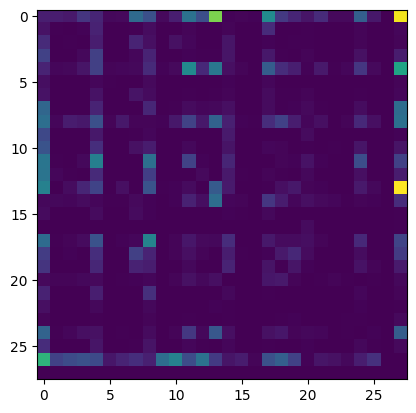

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline 

plt.imshow(N)

In [ ]:
plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(28):
    for j in range(28):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

In [ ]:
# if you notice above one has something like character then <S> 
# or <E> then character which will always such case will not occur
# instead of <S> and <E> we will use only one special char '.'
N = torch.zeros((27, 27), dtype=torch.int32) 

In [16]:
chars = sorted(list(set(''.join(words))))
# char to int
stoi = {s:i+1 for i, s in enumerate(chars)}  # {'.':0, 'a':1, 'b':2, ....}
stoi['.'] = 0
itos = {i:s for s, i in stoi.items()}   # {0:'.', 1:'a', 2:'b', ....}

In [17]:
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1][ix2] += 1

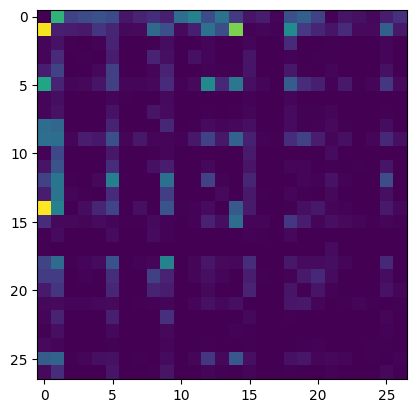

In [18]:
plt.imshow(N)

In [ ]:
plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

In [ ]:
N[0, :] # first row

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [21]:
# lets convert them into probability
p = N[0].float()
p /= p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [22]:
g = torch.Generator().manual_seed(2147483647)


In [23]:
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]

'm'

In [24]:
N.shape

torch.Size([27, 27])

In [25]:
P = N.float() # P is same size as N
# lets do model smoothing (to avoid prob of getting q after m to be 0), just make it 1
P = (N + 1).float()
P.sum(1, keepdim=True).shape

torch.Size([27, 1])

In [26]:
P.shape

torch.Size([27, 27])

In [27]:
# read the https://pytorch.org/docs/stable/notes/broadcasting.html
P /= P.sum(1, keepdim=True)
P

tensor([[3.1192e-05, 1.3759e-01, 4.0767e-02, 4.8129e-02, 5.2745e-02, 4.7785e-02,
         1.3038e-02, 2.0898e-02, 2.7293e-02, 1.8465e-02, 7.5577e-02, 9.2452e-02,
         4.9064e-02, 7.9195e-02, 3.5777e-02, 1.2321e-02, 1.6095e-02, 2.9008e-03,
         5.1154e-02, 6.4130e-02, 4.0830e-02, 2.4641e-03, 1.1759e-02, 9.6070e-03,
         4.2109e-03, 1.6719e-02, 2.9008e-02],
        [1.9583e-01, 1.6425e-02, 1.5983e-02, 1.3889e-02, 3.0756e-02, 2.0435e-02,
         3.9809e-03, 4.9835e-03, 6.8796e-02, 4.8685e-02, 5.1899e-03, 1.6779e-02,
         7.4575e-02, 4.8213e-02, 1.6039e-01, 1.8872e-03, 2.4475e-03, 1.7988e-03,
         9.6279e-02, 3.2997e-02, 2.0288e-02, 1.1264e-02, 2.4623e-02, 4.7771e-03,
         5.3963e-03, 6.0480e-02, 1.2857e-02],
        [4.3039e-02, 1.2051e-01, 1.4596e-02, 7.4850e-04, 2.4701e-02, 2.4551e-01,
         3.7425e-04, 3.7425e-04, 1.5719e-02, 8.1587e-02, 7.4850e-04, 3.7425e-04,
         3.8922e-02, 3.7425e-04, 1.8713e-03, 3.9671e-02, 3.7425e-04, 3.7425e-04,
         3.1549e-

In [28]:
P[0].sum() # make sure each row sums to 1

tensor(1.)

In [29]:
# generate new names 
g = torch.Generator().manual_seed(2147483647)
for i in range(5):
    out = []
    ix = 0 # first row 
    while True:
        #p = P[ix]
        # p = N[ix].float()
        # p /= p.sum() 
        # below line just generates uniform distributed which is untrained model, 
        # uncomment below to see how a un-trained model behaves
        # p = torch.ones(27) /27.0
        ix = torch.multinomial(P[ix], num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0: # we went back to first row and it will return same since generator is same
            break 
    print(''.join(out))
    

mor.
axx.
minaymoryles.
kondlaisah.
anchshizarie.


In [30]:
# we can sample from distribution
# torch.multinomial 
# Generator makes everything deterministic

g = torch.Generator().manual_seed(2147483647)
p = torch.rand(3, generator=g)
p = p / p.sum()
p


tensor([0.6064, 0.3033, 0.0903])

In [31]:
torch.multinomial(p, num_samples=10, replacement=True, generator=g)


tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0])

In [32]:
# GOAL: maximize likelihood of the data w.r.t. model parameters (statistical modeling)
# equivalent to maximizing the log likelihood (because log is monotonic)
# equivalent to minimizing the negative log likelihood
# equivalent to minimizing the average negative log likelihood

# log(a*b*c) = log(a) + log(b) + log(c)

In [33]:
# Lets try to evaluate the quality of this biagram model
# How do we evaluate this model in single number
# we use Maximum liklihood estimation(MLE) of log(probability)
# MLE uses product of prob, so log(prob) will be sum
log_liklihood = 0.0
n = 0
#for w in words:
for w in ["gautamq"]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1][ix2]
        logprob = torch.log(prob)
        log_liklihood += logprob
        n += 1
        #print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')
print(f'{log_liklihood=}')  
# Above number is either 0 (when all prob is 1, log(1)=0) or very high 
# negative number, but loss function should be minimum so we take negative 
# log liklihood(ll)
nll = -log_liklihood
print(f'{nll=}')  
print(f'{nll/n=}')  
# so the job is to minimize negative of log liklihood

log_liklihood=tensor(-29.6349)
nll=tensor(29.6349)
nll/n=tensor(3.7044)


In [34]:
# Probablitiy of selecting any character out of 27 is
# 1/27.0 so anything above 1/27.o meaning model learned 
# something 
1/27.0 

0.037037037037037035

In [35]:
# lets do same thing using neural network.
# we have loss functional nll (negative likelihood)
# input will be one character and output will be one character

In [36]:
# create training set of all bigrams (x, y)
# lets use gradient based optimization 
xs, ys = [], []
for w in words[:1]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        print(ch1, ch2)
        xs.append(ix1)
        ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)

. e
e m
m m
m a
a .


In [37]:
xs

tensor([ 0,  5, 13, 13,  1])

In [38]:
ys

tensor([ 5, 13, 13,  1,  0])

In [39]:
xs.dtype

torch.int64

In [40]:
# we can't feed directly integer but rather we encode it
# one-hot encoding.
import torch.nn.functional as F
#when we pass the input we want them to be float,
xenc = F.one_hot(xs, num_classes=27).float()
yenc = F.one_hot(ys, num_classes=27).float()

In [41]:
xenc.shape

torch.Size([5, 27])

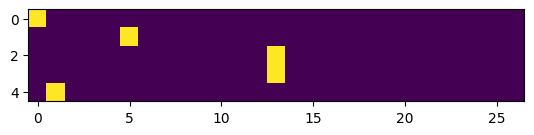

In [42]:
plt.imshow(xenc)

In [43]:
xenc.dtype

torch.float32

In [44]:
xenc.shape

torch.Size([5, 27])

In [45]:
w = torch.randn(27, 27)
(xenc @ w) # shape is (5, 27)
(xenc @ w)[3, 13]


tensor(-0.4506)

In [46]:
(xenc[3]*w[13]).sum()

tensor(-0.4506)

In [47]:
# we will treat them as log so we will exponent 
logits = xenc @ w
counts = logits.exp()
probs = counts / counts.sum(1, keepdim=True)
probs

tensor([[0.0151, 0.0441, 0.0317, 0.0129, 0.0085, 0.0410, 0.0324, 0.0880, 0.0384,
         0.1172, 0.0187, 0.0045, 0.0162, 0.0210, 0.0805, 0.0016, 0.0291, 0.0081,
         0.1357, 0.0275, 0.0151, 0.0196, 0.0884, 0.0073, 0.0167, 0.0386, 0.0421],
        [0.0214, 0.0029, 0.0215, 0.0491, 0.0123, 0.0048, 0.0303, 0.0757, 0.2492,
         0.0380, 0.0253, 0.0262, 0.0451, 0.0320, 0.0037, 0.0367, 0.0105, 0.0422,
         0.0049, 0.0213, 0.0356, 0.0084, 0.0253, 0.0833, 0.0479, 0.0341, 0.0124],
        [0.0476, 0.0290, 0.0348, 0.0288, 0.0289, 0.0608, 0.2057, 0.0600, 0.0546,
         0.0093, 0.0238, 0.0813, 0.0338, 0.0110, 0.0064, 0.0091, 0.0169, 0.0560,
         0.0287, 0.0257, 0.0035, 0.0099, 0.0231, 0.0488, 0.0030, 0.0480, 0.0114],
        [0.0476, 0.0290, 0.0348, 0.0288, 0.0289, 0.0608, 0.2057, 0.0600, 0.0546,
         0.0093, 0.0238, 0.0813, 0.0338, 0.0110, 0.0064, 0.0091, 0.0169, 0.0560,
         0.0287, 0.0257, 0.0035, 0.0099, 0.0231, 0.0488, 0.0030, 0.0480, 0.0114],
        [0.0070, 0.0423,

In [48]:
probs[0].sum()

tensor(1.0000)

In [49]:
probs.shape

torch.Size([5, 27])

In [50]:
# summary

In [51]:
xs # input

tensor([ 0,  5, 13, 13,  1])

In [52]:
ys # desired output

tensor([ 5, 13, 13,  1,  0])

In [53]:
# randomly initialize 27 neurons weight, each neuron recieves 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g)


In [54]:
# forward pass 
xenc = F.one_hot(xs, num_classes=27).float()
logits = xenc @ W
# last two lines are softmax used mostly in classifications
counts = logits.exp()
probs = counts / counts.sum(1, keepdims=True)

In [55]:
probs.shape

torch.Size([5, 27])

In [56]:
nlls = torch.zeros(5)
for i in range(5):
  # i-th bigram:
  x = xs[i].item() # input character index
  y = ys[i].item() # label character index
  print('--------')
  print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x},{y})')
  print('input to the neural net:', x)
  print('output probabilities from the neural net:', probs[i])
  print('label (actual next character):', y)
  p = probs[i, y]
  print('probability assigned by the net to the the correct character:', p.item())
  logp = torch.log(p)
  print('log likelihood:', logp.item())
  nll = -logp
  print('negative log likelihood:', nll.item())
  nlls[i] = nll

print('=========')
print('average negative log likelihood, i.e. loss =', nlls.mean().item())

--------
bigram example 1: .e (indexes 0,5)
input to the neural net: 0
output probabilities from the neural net: tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459])
label (actual next character): 5
probability assigned by the net to the the correct character: 0.012286253273487091
log likelihood: -4.3992743492126465
negative log likelihood: 4.3992743492126465
--------
bigram example 2: em (indexes 5,13)
input to the neural net: 5
output probabilities from the neural net: tensor([0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
        0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
        0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472])
label (actual next character): 13
probability assigned by the net to the the correct character:

In [57]:
# --------- !!! OPTIMIZATION !!! yay --------------


In [58]:
xs


tensor([ 0,  5, 13, 13,  1])

In [59]:
ys


tensor([ 5, 13, 13,  1,  0])

In [60]:
# randomly initialize 27 neurons' weights. each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

In [61]:
# forward pass
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
# probs[0, 5], probs[1, 13], probs[2, 13], probs[3, 1], probs[4, 0]
# negative average of log likelihood
loss = -probs[torch.arange(5), ys].log().mean()

In [62]:
loss

tensor(3.7693, grad_fn=<NegBackward0>)

In [63]:
# backward pass
W.grad = None # setting gradient zero
loss.backward()

# update the parameters 
W.data += -0.1 * W.grad

In [64]:
W.shape

torch.Size([27, 27])

In [65]:
W.grad.shape

torch.Size([27, 27])

In [66]:
# --------- !!! OPTIMIZATION !!! yay, but this time actually --------------


In [67]:
# create the dataset
xs, ys = [], []
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)
        
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

number of examples:  228146


In [68]:
# gradient descent
iterations = 5
for i in range(iterations): 
    # forward pass 
    xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
    loss = -probs[torch.arange(num), ys].log().mean() +  + 0.01*(W**2).mean() # second term is regularization
    print(loss.shape)
    print(f'iteration {i+1}, loss {loss.item()}')
    # backward pass
    W.grad = None
    loss.backward()

    # update the params 
    W.data += -90*W.grad


torch.Size([])
iteration 1, loss 3.7686190605163574
torch.Size([])
iteration 2, loss 3.172484874725342
torch.Size([])
iteration 3, loss 2.9527597427368164
torch.Size([])
iteration 4, loss 2.8341522216796875
torch.Size([])
iteration 5, loss 2.7628936767578125


In [69]:
# finally, sample from the 'neural net' model
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
  
  out = []
  ix = 0
  while True:
    
    # ----------
    # BEFORE:
    #p = P[ix]
    # ----------
    # NOW:
    xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    p = counts / counts.sum(1, keepdims=True) # probabilities for next character
    # ----------
    
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

mrla.
wxcjonaynnnxrer.
krelodfrah.
anansiqzarie.
pccn.


In [70]:
# --------- !!! OPTIMIZATION !!! Playing with it with two layers --------------


In [83]:
# create the dataset
xs, ys = [], []
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)
        
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W1 = torch.randn((27, 27), generator=g, requires_grad=True)
W2 = torch.randn((27, 27), generator=g, requires_grad=True)

number of examples:  228146


In [87]:
# gradient descent
iterations = 50
for i in range(iterations): 
    # forward pass 
    xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
    logits1 = xenc @ W1 # predict log-counts
    logits = logits1 @ W2 
    counts = logits.exp() # counts, equivalent to N
    probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
    loss = -probs[torch.arange(num), ys].log().mean()   + 0.01*(W1**2).mean() + 0.0001*(W2**2).mean() # second term is regularization
    print(loss.shape)
    print(f'iteration {i+1}, loss {loss.item()}')
    # backward pass
    W1.grad = None
    W2.grad = None
    loss.backward()

    # update the params 
    W1.data += -5*W1.grad
    W2.data += -10*W2.grad


torch.Size([])
iteration 1, loss 2.5248165130615234
torch.Size([])
iteration 2, loss 2.5174520015716553
torch.Size([])
iteration 3, loss 2.5206289291381836
torch.Size([])
iteration 4, loss 2.5149261951446533
torch.Size([])
iteration 5, loss 2.5185022354125977
torch.Size([])
iteration 6, loss 2.5158615112304688
torch.Size([])
iteration 7, loss 2.5203921794891357
torch.Size([])
iteration 8, loss 2.5245559215545654
torch.Size([])
iteration 9, loss 2.5258474349975586
torch.Size([])
iteration 10, loss 2.5343918800354004
torch.Size([])
iteration 11, loss 2.524855852127075
torch.Size([])
iteration 12, loss 2.5263218879699707
torch.Size([])
iteration 13, loss 2.5188770294189453
torch.Size([])
iteration 14, loss 2.5180766582489014
torch.Size([])
iteration 15, loss 2.514256477355957
torch.Size([])
iteration 16, loss 2.5131795406341553
torch.Size([])
iteration 17, loss 2.5106515884399414
torch.Size([])
iteration 18, loss 2.509347677230835
torch.Size([])
iteration 19, loss 2.5072426795959473
torch

In [88]:
# finally, sample from the 'neural net' model
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
  
  out = []
  ix = 0
  while True:
    
    # ----------
    # BEFORE:
    #p = P[ix]
    # ----------
    # NOW:
    xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    p = counts / counts.sum(1, keepdims=True) # probabilities for next character
    # ----------
    
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

mrla.
wxcjonaynnnxrer.
krelodfrah.
anansiqzarie.
pccn.
